In [53]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [55]:
def grid_search_cv():
    pass

In [56]:
def euclidian_dist(a,b):
    return np.sum(np.sqrt((a-b)**2), axis=1)

In [85]:
def knn(n_neighbors, train_x, test_x, train_y, test_y):

    predicted_y = np.array([np.argmax(np.bincount(train_y[np.argsort(euclidian_dist(x, train_x))[0:n_neighbors]])) for x in test_x])
  
    accuracy = float(sum(predicted_y == test_y))/ float(len(test_y))
  
    return (accuracy, predicted_y)

In [86]:
def confusion_matrix(test_y, predicted_y, class_num):
  
    return np.bincount(test_y * class_num + predicted_y).reshape((class_num, class_num))

In [88]:
def cross_validation(X, y, knn, cv):
    
    accuracy_list = []
    data = np.array(np.hstack((X,y[:, np.newaxis])))
    for k in range(cv):
        splitted = np.split(data, cv)
        test = splitted.pop(k)
        train = np.vstack(splitted)

        train_x = train[:,:2]
        train_y = train[:, 2]

        test_x = test[:,:2]
        test_y = test[:, 2]

        train_x = train_x.astype(int)
        train_y = train_y.astype(int)
        test_x = test_x.astype(int)
        test_y = test_y.astype(int)

        accuracy, predicted_y = knn(3, train_x, test_x, train_y, test_y)
        accuracy_list.append(accuracy)
        print('Accuracy for k = {} is {}'.format(k, accuracy))

        conf_matrix = confusion_matrix(test_y, predicted_y, 3)
        print('Confusion matrix for k = {} :'.format(k))
        print(conf_matrix)
 
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    print(mean_accuracy)

In [90]:
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, random_state=31)

cv = 5

cross_validation(X, y, knn, cv)


Accuracy for k = 0 is 0.75
Confusion matrix for k = 0 :
[[59  2  0]
 [12 59  1]
 [31  4 32]]
Accuracy for k = 1 is 0.745
Confusion matrix for k = 1 :
[[28  6 26]
 [ 0 58  7]
 [ 9  3 63]]
Accuracy for k = 2 is 0.745
Confusion matrix for k = 2 :
[[65  6  0]
 [11 52  0]
 [31  3 32]]
Accuracy for k = 3 is 0.765
Confusion matrix for k = 3 :
[[61  6  5]
 [ 7 54  0]
 [25  4 38]]
Accuracy for k = 4 is 0.76
Confusion matrix for k = 4 :
[[32  8 28]
 [ 0 62 10]
 [ 0  2 58]]
0.7530000000000001


"accuracy_list = []\ndata = np.array(np.hstack((X,y[:, np.newaxis])))\nfor k in range(cv):\n    splitted = np.split(data, cv)\n    test = splitted.pop(k)\n    train = np.vstack(splitted)\n    \n    train_x = train[:,:2]\n    train_y = train[:, 2]\n\n    test_x = test[:,:2]\n    test_y = test[:, 2]\n    \n    train_x = train_x.astype(int)\n    train_y = train_y.astype(int)\n    test_x = test_x.astype(int)\n    test_y = test_y.astype(int)\n    \n    accuracy, predicted_y = knn(3, train_x, test_x, train_y, test_y)\n    accuracy_list.append(accuracy)\n    print('Accuracy for k = {} is {}'.format(k, accuracy))\n  \n    conf_matrix = confusion_matrix(test_y, predicted_y, 3)\n    print('Confusion matrix for k = {} :'.format(k))\n    print(conf_matrix)\n \nmean_accuracy = sum(accuracy_list) / len(accuracy_list)\nprint(mean_accuracy)"

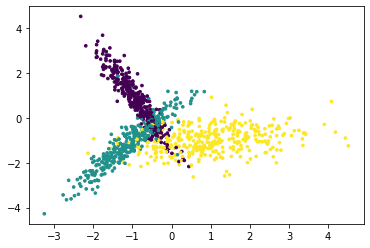

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=7);